# Calculate river SPM


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

In [2]:
river_names = ['Akpat Kuunga', 'Glacier', 'Marcil Creek', 'Saaqu', 'Devon Isl.', \
               'Cunningham', 'Garnier', 'Mecham', 'Creswell', 'Le Feuvre Inlet', \
               'Pasley', 'Simpson', 'Ellice', 'Tree']
river_lats = [73.7638, 73.6124, 72.9971, 73.7936, 74.5110, 74.0153, 73.9445, 74.6926, 72.8491, 72.3412, \
              70.4696, 67.6763, 67.8930, 67.6242]
river_lons = [-80.4468, -78.6805, -84.9864, -86.9829, -88.4910, -93.6242, -92.0369, -94.7783, -93.4162, \
             -96.9172, -95.5796, -100.5683, -104.0758, -111.9161]
river_S   = [0.06, 0.02, 0.03, 0.10, 0.07, 0.11, 0.13, 0.14, 0.16, 0.19, 0.11, 0.09, 0.04, 0.05]
river_spm = [8.31, 261, 3.18, np.nan, np.nan, 0.85, 13.6, 0.14, 2.43, np.nan, 0.03, 19.1, 4.82, np.nan]# mg/L

Station locations:

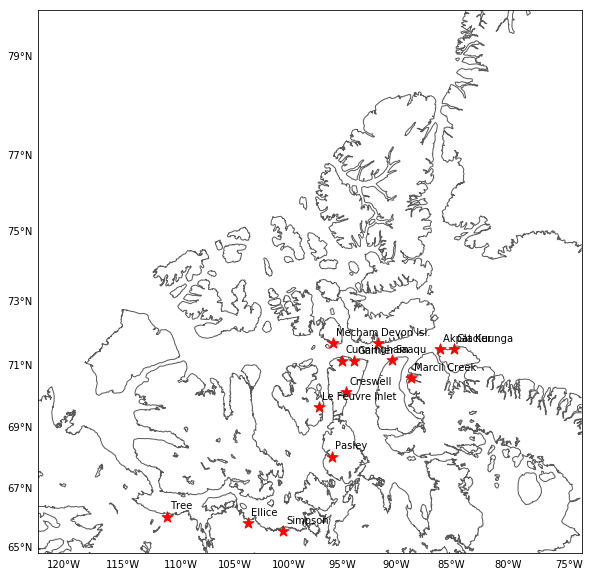

In [4]:
fig,ax = plt.subplots(figsize=(10,10))
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.25e6, height=2.25e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(river_lons, river_lats)
 
proj.scatter(x, y, marker='*',s=130,zorder=3, c='r')

for i, (X, Y) in enumerate(zip(x, y), start=1):
    ax.annotate(river_names[i-1], (X,Y), xytext=(3, 8), textcoords='offset points')
    
# fig.savefig('river_stations.png',bbox_inches='tight')

In [8]:
river_names[11:14]

['Simpson', 'Ellice', 'Tree']

In [9]:
spm_glaciers = river_spm[1]
spm_cont     = river_spm[11:14]
spm_other    = river_spm[2:11]

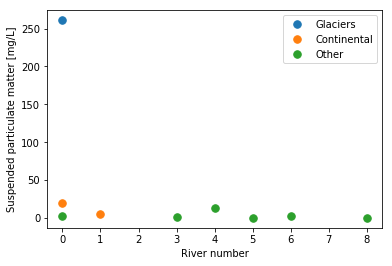

In [18]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(spm_glaciers, '.', markersize=15, label='Glaciers')
ax.plot(spm_cont,     '.', markersize=15, label='Continental')
ax.plot(spm_other,    '.', markersize=15, label='Other')

# ax.set_ylim(0,100)
ax.set_ylabel('Suspended particulate matter [mg/L]')
ax.set_xlabel('River number')
ax.legend()

- Glacial: Glacial River
- Continental: Tree River, Ellice River, Simpson River
- Other: Marcil, Saaqu, Devon Island, Cunningham, Garnier, Mecham, Creswell, Le Feuvre Inlet, Pasley

In [21]:
spm_other_ave    = np.nanmean(spm_other)
spm_glaciers_ave = np.nanmean(spm_glaciers)
spm_cont_ave     = np.nanmean(spm_cont)

In [28]:
print('SPM, glaciers:    '+str(spm_glaciers_ave))
print('SPM, continental: '+str(spm_cont_ave))
print('SPM, other:       '+str(spm_other_ave)) 

SPM, glaciers:    261.0
SPM, continental: 11.96
SPM, other:       3.3716666666666675


Convert mg/L to mol/L:

$ \frac{mg_{sediment}}{L}\cdot \frac{1\ kg}{1e6\ mg} \cdot \frac{g_{Mn}}{kg_{sediment}} \cdot \frac{mol_{Mn}}{g_{Mn}}$

In [27]:
print('SPM, glaciers:    '+str(spm_glaciers_ave*1e-6))
print('SPM, continental: '+str(spm_cont_ave*1e-6))
print('SPM, other:       '+str(spm_other_ave*1e-6)) 

SPM, glaciers:    0.000261
SPM, continental: 1.196e-05
SPM, other:       3.3716666666666673e-06
